# **Cross Validation**

* Cross validation is a technique to evaluate a model by splitting the data into a training and a test set.

* The training set is used to train the model, while the test set is used to evaluate the model's performance.


Cross-validation is a statistical technique used in machine learning and data analysis to evaluate how well a model is able to generalize to new data.

In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set).

The basic idea is to divide the available data into two parts: 
1. a training set, which is used to train the model, and 
2. a validation set, which is used to evaluate the model's performance.

## Types of CV:

* **k-fold cross-validation**
* **train-test split**
* **leave-one-out cross-validation** (LOOCV)
* **stratified cross-validation**
* **Times series cross-validation**
* **Group cross-validation**


## Types of Cross-Validation

There are several types of cross validation techniques, including k-fold cross validation, leave-one-out cross validation, and Holdout validation, Stratified Cross-Validation. The choice of technique depends on the size and nature of the data, as well as the specific requirements of the modeling problem.

`1. Holdout Validation`

In Holdout Validation, we perform training on the 50% of the given dataset and rest 50% is used for the testing purpose. It’s a simple and quick way to evaluate a model. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e. higher bias.

`2. LOOCV (Leave One Out Cross Validation)`

In this method, we perform training on the whole dataset but leaves only one data-point of the available dataset and then iterates for each data-point. In LOOCV, the model is trained on n-1    samples and tested on the one omitted sample, repeating this process for each data point in the dataset. It has some advantages as well as disadvantages also.

### An advantage of using this method is that we make use of all data points and hence it is low bias.

The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.

`3. Stratified Cross-Validation`

It is a technique used in machine learning to ensure that each fold of the cross-validation process maintains the same class distribution as the entire dataset. This is particularly important when dealing with imbalanced datasets, where certain classes may be underrepresented. In this method,

The dataset is divided into k folds while maintaining the proportion of classes in each fold.
During each iteration, one-fold is used for testing, and the remaining folds are used for training.
The process is repeated k times, with each fold serving as the test set exactly once.
Stratified Cross-Validation is essential when dealing with classification problems where maintaining the balance of class distribution is crucial for the model to generalize well to unseen data.

`4. K-Fold Cross Validation`

In K-Fold Cross Validation, we split the dataset into k number of subsets (known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

`Note: It is always suggested that the value of k should be 10 as the lower value of k is takes towards validation and higher value of k leads to LOOCV method.`

## Example of K-fold cross validation

In `k-fold cross-validation`, the available data is divided into k equal parts or "folds". The model is then trained on k-1 of the folds and validated on the remaining fold. This process is repeated k times, with each fold being used once as the validation set. The results from each fold are then averaged to obtain an overall estimate of the model's performance.

### **Summary:**

In summary, cross-validation is a powerful technique for evaluating the performance of machine learning models and can help to ensure that our models are accurate, reliable, and able to generalize to new data.

## Advantages and Disadvantages of Cross Validation
### Advantages:

`Overcoming Overfitting:` Cross validation helps to prevent overfitting by providing a more robust estimate of the model’s performance on unseen data.
`Model Selection:` Cross validation can be used to compare different models and select the one that performs the best on average.
`Hyperparameter tuning:` Cross validation can be used to optimize the hyperparameters of a model, such as the regularization parameter, by selecting the values that result in the best performance on the validation set.
`Data Efficient:` Cross validation allows the use of all the available data for both training and validation, making it a more data-efficient method compared to traditional validation techniques.


### Disadvantages:

`Computationally Expensive:` Cross validation can be computationally expensive, especially when the number of folds is large or when the model is complex and requires a long time to train.\
`Time-Consuming:` Cross validation can be time-consuming, especially when there are many hyperparameters to tune or when multiple models need to be compared.\
`Bias-Variance Tradeoff: `The choice of the number of folds in cross validation can impact the bias-variance tradeoff, i.e., too few folds may result in high variance, while too many folds may result in high bias.\

In [ ]:
%%time
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Load the Iris dataset
iris = load_iris()

# Define the Gaussian Naive Bayes model
nb = GaussianNB()

# Perform k-fold cross-validation with k=5
scores = cross_val_score(nb, iris.data, iris.target, cv=5, scoring='accuracy')

# Print the scores for each fold and the mean score
print("Scores for each fold:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Scores for each fold: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean score: 0.9533333333333334
Standard deviation: 0.02666666666666666
CPU times: user 5.35 ms, sys: 1.35 ms, total: 6.7 ms
Wall time: 6.08 ms


# **K-fold Cross Validation vs. train_test split**

K-fold cross-validation and train-test split are two popular techniques used in machine learning to evaluate the performance of a model. Here are some key differences between the two:

1. **Data usage:** 

>In k-fold cross-validation, the data is split into k equal parts or "folds". The model is trained on k-1 of the folds and validated on the remaining fold. This process is repeated k times, with each fold being used once as the validation set. 

> In contrast, train-test split divides the data into two parts: a training set and a testing set, typically with a ratio of 70-30 or 80-20. The model is trained on the training set and evaluated on the testing set.

2. **Data size:** 
> K-fold cross-validation is often used when the dataset is relatively small, as it allows for better use of the available data. 

> In contrast, train-test split is typically used when the dataset is larger, as it is faster to implement and may be sufficient for evaluating the model's performance.

3. **Performance estimation:** 
>K-fold cross-validation provides a more accurate estimate of the model's performance, as it evaluates its performance on multiple independent subsets of the data. This helps to reduce the variance of the performance estimate and detect overfitting. 

>In contrast, train-test split provides a less accurate estimate of the model's performance, as it depends on the specific subset of the data used for testing.

4. **Computation time:** 
>K-fold cross-validation can be computationally expensive, as it requires training and validating the model k times. 

>In contrast, train-test split is faster to implement and requires training and validating the model only once.

Overall, `k-fold cross-validation is a more robust and accurate technique for evaluating the performance of a machine learning model, especially when the dataset is relatively small`. 

`Train-test split is a faster and simpler technique that can be used when the dataset is larger and a quick estimate of the model's performance is needed.`

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the tips dataset
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# Define the features and target variable
X = tips[['total_bill', 'tip', 'size']]
y = tips['sex']

# Define the Gaussian Naive Bayes model
model = GaussianNB()

# Perform k-fold cross-validation with k=5
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the scores for each fold and the mean score
print("Scores for each fold:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Scores for each fold: [0.55102041 0.55102041 0.59183673 0.65306122 0.54166667]
Mean score: 0.5777210884353741
Standard deviation: 0.04147568336521195


# How to plot k-fold CV?

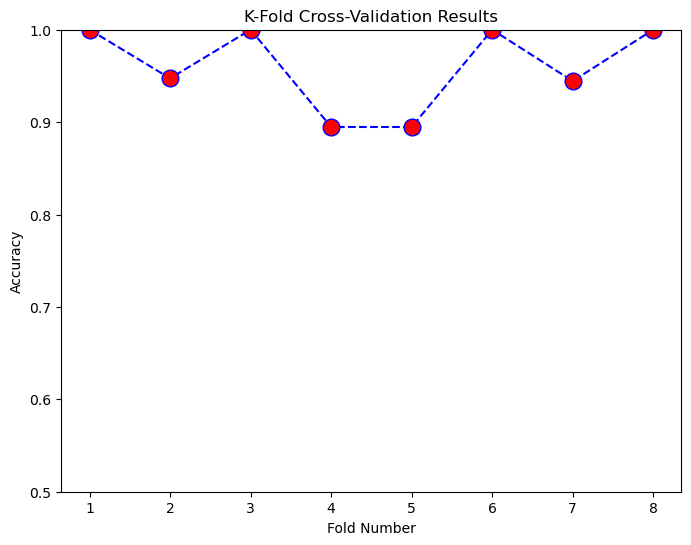

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the decision tree classifier
clf = DecisionTreeClassifier()

# Perform k-fold cross-validation with k=8
scores = cross_val_score(clf, X, y, cv=8)

# Plot the results
plt.figure(figsize=(8,6))
plt.plot(range(1,9), scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()
